# Lab 4



Importing Libraries


In [1]:
%matplotlib inline
import os
import time
import math
import pylab 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import sqrt
import scipy.stats as stats

import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import  LassoLarsIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")


# Pre Processing the Dataset

In [5]:
if 'preprocessed_data.csv' in os.listdir():
    df = pd.read_csv('preprocessed_data.csv')
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez      M      594 White Dale Suite 530  ...     4154   
3    White      M   9443 Cynthia Court Apt. 038  ...     1939   
4   Garcia      M              408 Bradley Rest  ...       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud minute  year_of_birth  
0        0      0           1988  
1        0      0           1978  
2        0      0           1962  
3        0      1           1967  
4        0      3           1986  

[5 rows x 25 columns]

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez      M      594 White Dale Suite 530  ...     4154   
3    White      M   9443 Cynthia Court Apt. 038  ...     1939   
4   Garcia      M              408 Bradley Rest  ...       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud minute  year_of_birth  
0        0      0           1988  
1        0      0           1978  
2        0      0           1962  
3        0      1           1967  
4        0      3           1986  

[5 rows x 25 columns]

# Variables 

**Predictors**  (3-6)
1. Transaction date and time
2. City population
3. Lattitude
4. Longitude



**Targets** (2-3)
1. Amount
2. Year of birth

# Step 1: Substantiation of chosen sampling. 
Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

#### Since the dataset is huge we will choose only transactions from 23.03.2020 to 27.03.2020 to see differences

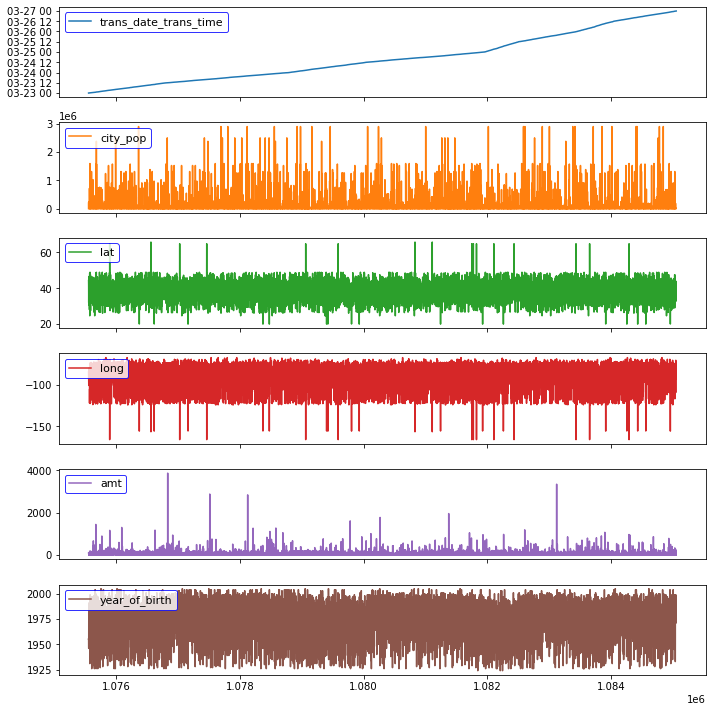

In [7]:
# Plot the choosen target variables.

cols = ['trans_date_trans_time', 'city_pop', 'lat', 'long', 'amt', 'year_of_birth']
cols_x = ['trans_date_trans_time', 'city_pop', 'lat', 'long']
cols_y = ['amt', 'year_of_birth']

subsamples = df[(df['trans_date_trans_time']>=pd.to_datetime('23.03.2020')) & (df['trans_date_trans_time']<=pd.to_datetime('27.03.2020'))][cols]
# subsamples = df[(df['trans_date_trans_time']>=pd.to_datetime('23.03.2020')) & (df['trans_date_trans_time']<=pd.to_datetime('27.03.2020')) & (df['state']=='TX')][cols]

fig, axes = plt.subplots(6,1, figsize=(10,10), sharex=True)
subsamples[cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, cols):
    
#     ax.set_xlabel('Monthly')
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()

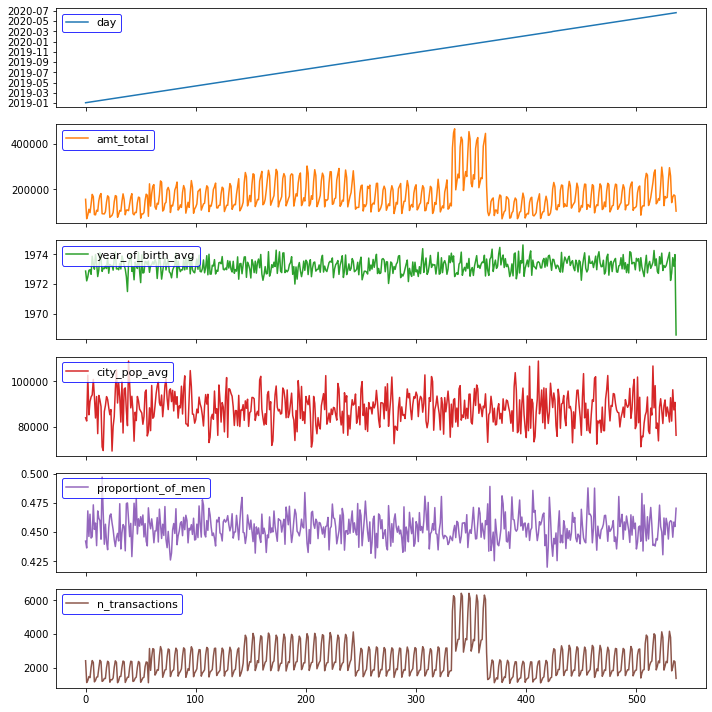

In [8]:
# Same data, but aggregated in days
df['day'] = df['trans_date_trans_time'].dt.floor('d')
df['gender_n'] = df['gender'].apply(lambda x: 1 if x=='M' else 0)

df_daily = df.groupby('day', as_index=False).agg({"amt": "sum", "year_of_birth": "mean", "city_pop": "mean", 'gender_n': "mean", "zip": "count"})
df_daily.rename(columns={'amt': 'amt_total', 'year_of_birth':'year_of_birth_avg', 'city_pop':'city_pop_avg', 'gender_n': 'proportiont_of_men', 'zip': 'n_transactions'}, inplace=True)

cols_daily = df_daily.columns

fig, axes = plt.subplots(6,1, figsize=(10,10), sharex=True)
df_daily[cols_daily].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, cols_daily):
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
    
# now to use tight layout
plt.tight_layout()

In [9]:
df_daily.to_csv('daily_data.csv')

# Step 2: Stationary analysis.
Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

In [10]:
#Stationary analysis indiviually for each variable is done here 

%pylab inline
import statsmodels.tsa.api as smt

for col in cols:
    result = smt.stattools.adfuller(subsamples[col])
    print('Augmented Dickey-Fuller test for {}: \n\tStatistic value = {:.4f}\n\tp-value = {:.4f}'.format(col, result[0], result[1]))

Populating the interactive namespace from numpy and matplotlib
Augmented Dickey-Fuller test for trans_date_trans_time: 
	Statistic value = 5.8971
	p-value = 1.0000
Augmented Dickey-Fuller test for city_pop: 
	Statistic value = -98.9655
	p-value = 0.0000
Augmented Dickey-Fuller test for lat: 
	Statistic value = -97.2344
	p-value = 0.0000
Augmented Dickey-Fuller test for long: 
	Statistic value = -98.0626
	p-value = 0.0000
Augmented Dickey-Fuller test for amt: 
	Statistic value = -97.8900
	p-value = 0.0000
Augmented Dickey-Fuller test for year_of_birth: 
	Statistic value = -8.8981
	p-value = 0.0000


In [11]:
#Stationary analysis indiviually for each variable is done here 

%pylab inline
import statsmodels.tsa.api as smt

for col in cols_daily:
    result = smt.stattools.adfuller(df_daily[col])
    print('Augmented Dickey-Fuller test for {}: \n\tStatistic value = {:.5f}\n\tp-value = {:.5f}'.format(col, result[0], result[1]))

Populating the interactive namespace from numpy and matplotlib
Augmented Dickey-Fuller test for day: 
	Statistic value = 531.15419
	p-value = 1.00000
Augmented Dickey-Fuller test for amt_total: 
	Statistic value = -3.64280
	p-value = 0.00499
Augmented Dickey-Fuller test for year_of_birth_avg: 
	Statistic value = -4.58073
	p-value = 0.00014
Augmented Dickey-Fuller test for city_pop_avg: 
	Statistic value = -8.26418
	p-value = 0.00000
Augmented Dickey-Fuller test for proportiont_of_men: 
	Statistic value = -5.55063
	p-value = 0.00000
Augmented Dickey-Fuller test for n_transactions: 
	Statistic value = -3.63352
	p-value = 0.00515


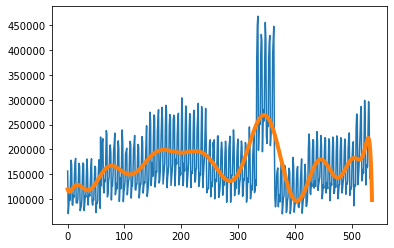

In [12]:
# It didn't make any sence, but still looks cool. 
def trendline(data, order=9):
    #polynomial trend
    trend = np.polyfit(data.index.values, list(data), order)
    return np.poly1d(trend)(data.index.values)

trend = trendline(df_daily['amt_total'], 20)
plt.plot(df_daily['amt_total'])
plt.plot(trend, linewidth=4)
plt.show()

#### We will use daily aggredated data further

# Step 3: Covariance or correlation function analysis.
Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

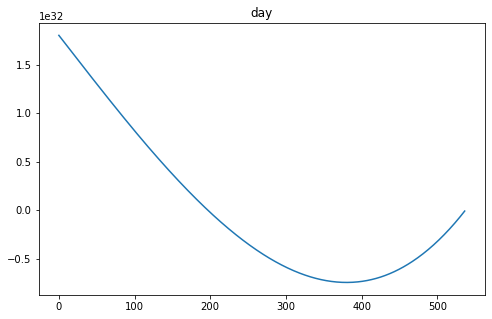

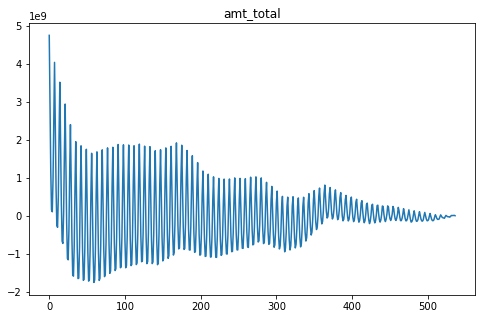

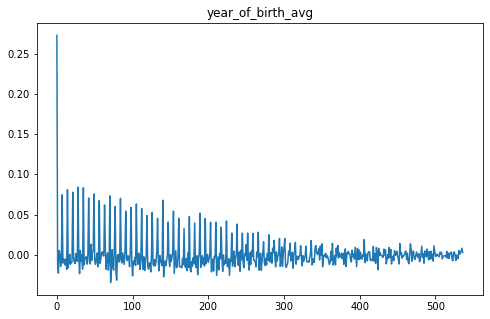

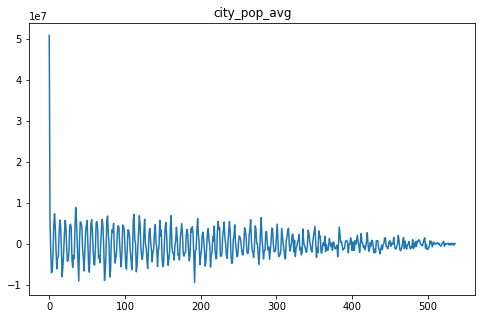

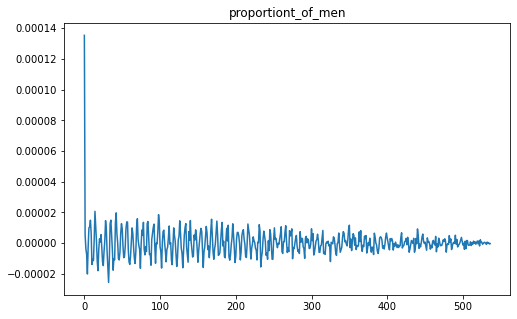

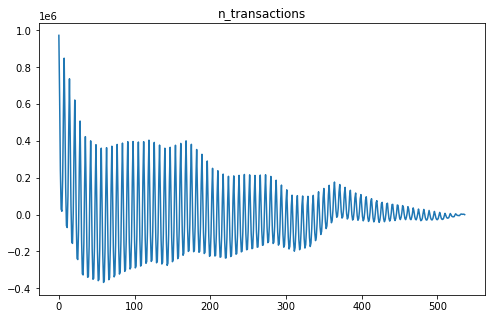

In [13]:
from statsmodels.tsa import stattools

#autocovariance without window

for col in cols_daily:
    plt.figure(figsize=(8, 5))
    plt.plot(stattools.acovf(df_daily[col],fft=False), label=col)
    plt.title(col)
    plt.show()

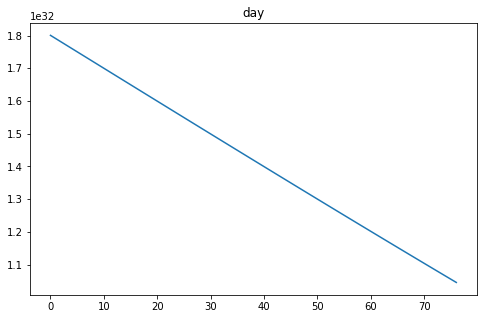

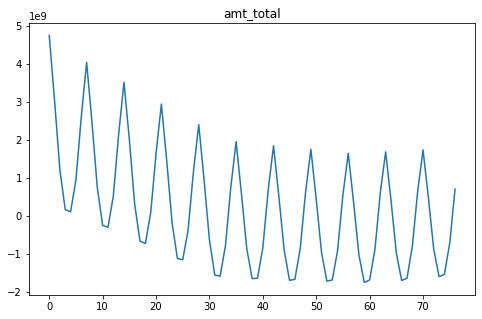

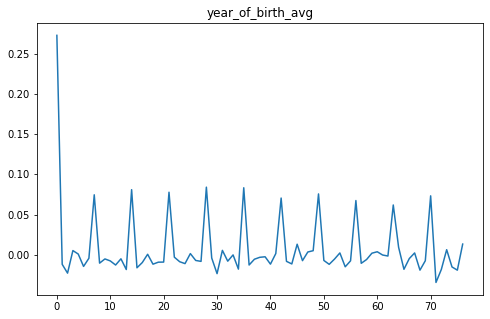

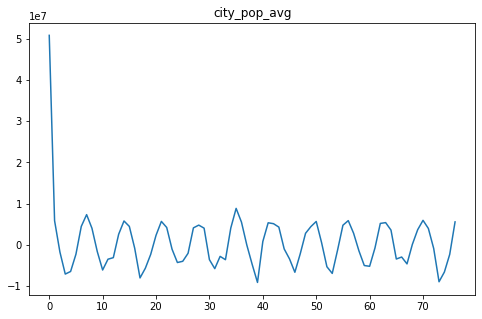

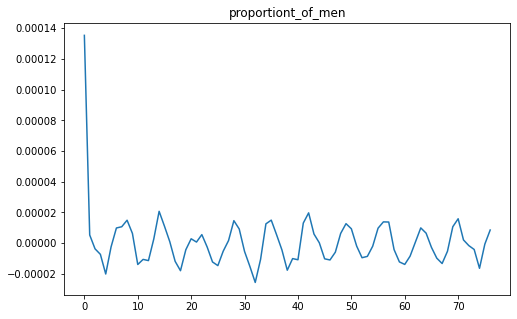

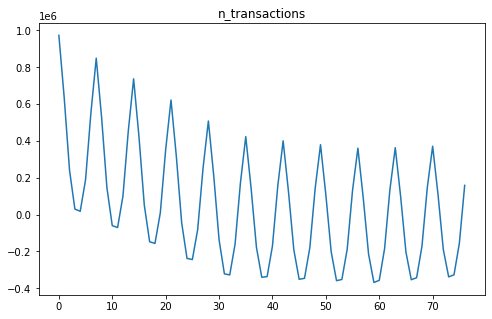

In [14]:
#autocovariance upto N values

N=df_daily.shape[0]//7

for col in cols_daily:
    plt.figure(figsize=(8, 5))
    plt.plot(stattools.acovf(df_daily[col], nlag=N,fft=False), label=col)
    plt.title(col)
    plt.show()

Text(0.5, 0, 'Sample')

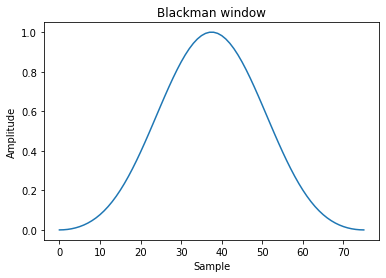

In [15]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


window_size = df_daily.shape[0]//7
blackman = signal.blackman(M=window_size)
bartlett = signal.hanning(M=window_size)

plt.plot(blackman)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

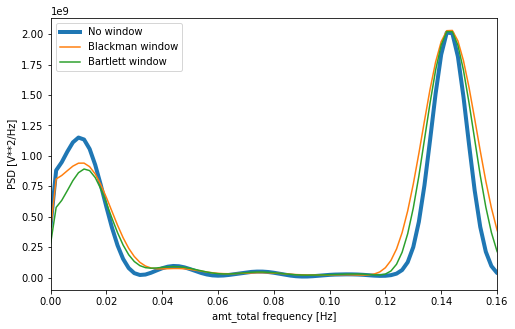

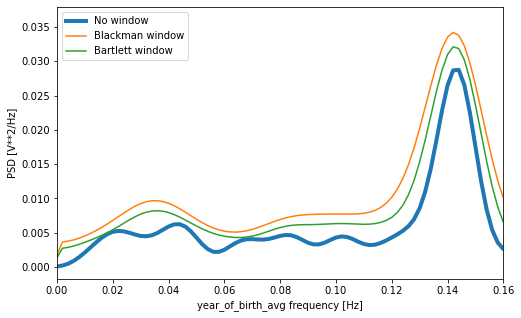

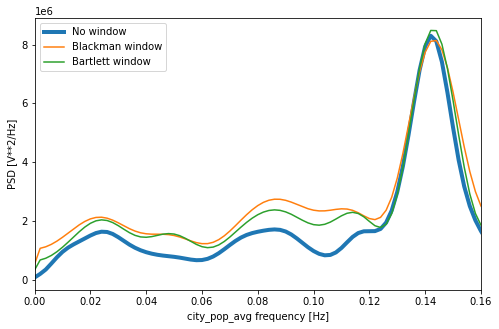

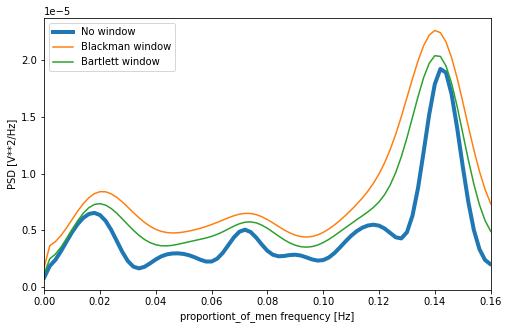

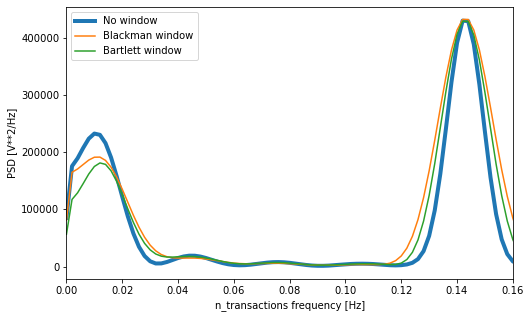

In [16]:
for col in cols_daily[1:]: # Everything but datetime
    nftt = 500
    plt.figure(figsize=(8, 5))
    f, Pxx_den = signal.welch(df_daily[col], fs=1, scaling='spectrum', nfft = nftt, nperseg=100)
    f_window, Pxx_den_window = signal.welch(df_daily[col], fs=1, window = blackman, nfft = nftt, scaling='spectrum')
    f_window_bart, Pxx_den_window_bart = signal.welch(df_daily[col], fs=1, window = bartlett, nfft = nftt, scaling='spectrum')
    plt.plot(f, Pxx_den, linewidth=4, label='No window')
    plt.plot(f_window, Pxx_den_window, label='Blackman window')
    plt.plot(f_window_bart, Pxx_den_window_bart, label='Bartlett window')

    plt.legend()
    plt.xlabel(col+' frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlim((0,0.16))
    plt.show()

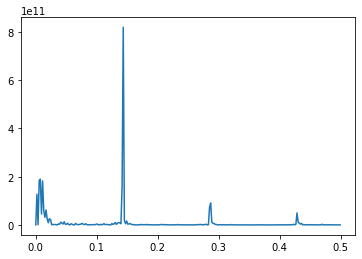

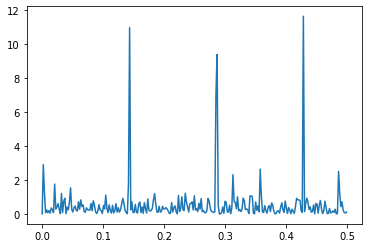

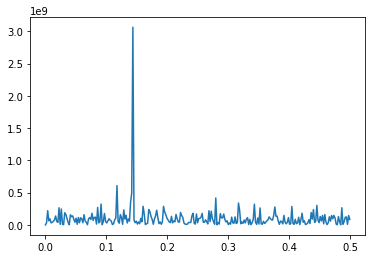

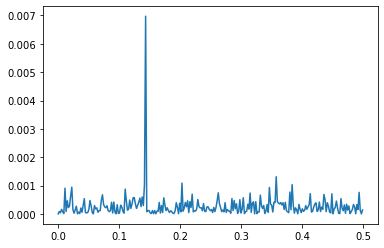

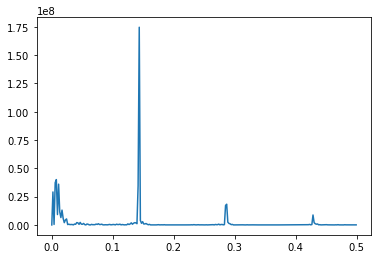

In [17]:
for col in cols_daily[1:]:
    f, p = signal.periodogram(x=df_daily[col],fs=1,window=None)
    plt.plot(f,p)
    plt.show()

# Step 4: Noise filtration.
Filter high frequencies (noise) with chosen 2 filters for target variables.


In [28]:
df_daily.rolling()

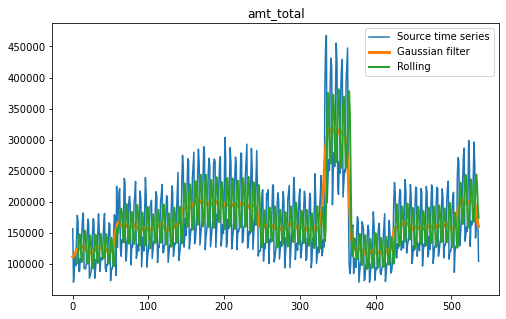

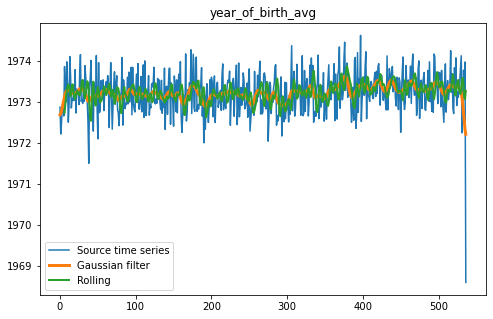

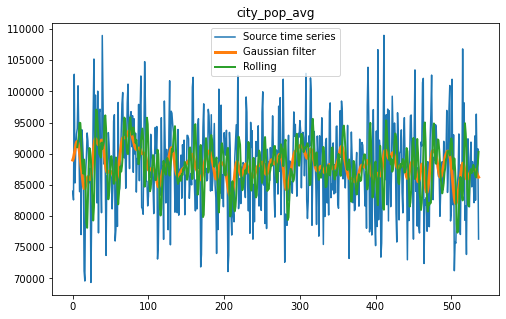

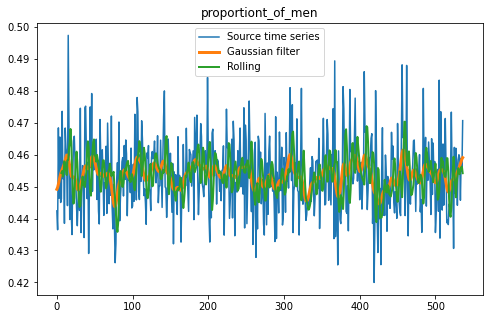

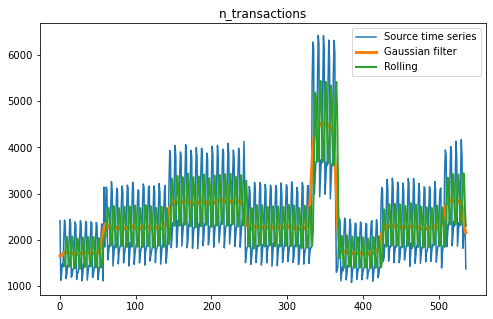

In [46]:
from scipy.ndimage import gaussian_filter

df_daily_gauss = df_daily.copy()
df_daily_rolling = df_daily.copy()

for col in cols_daily[1:]:
    df_daily_gauss[col] = gaussian_filter(df_daily[col], sigma=3)
    df_daily_rolling[col] = df_daily[col].rolling(7, win_type='bartlett').mean()
    plt.figure(figsize=(8, 5))
    plt.plot(df_daily[col], label='Source time series')
    plt.plot(df_daily_gauss[col], linewidth=3, label='Gaussian filter')
    plt.plot(df_daily_rolling[col], linewidth=2, label='Rolling')
    plt.title(col)
    plt.legend()
    plt.show()

# Step 5: Estimation of spectral density function 
Estimate spectral density function for with and without filtering.

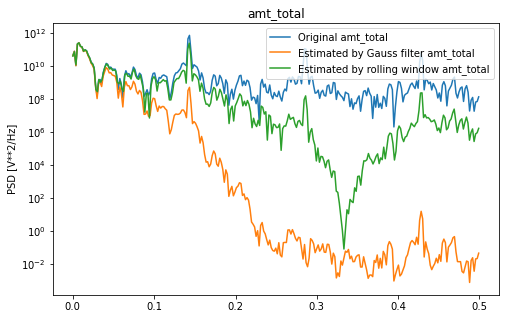

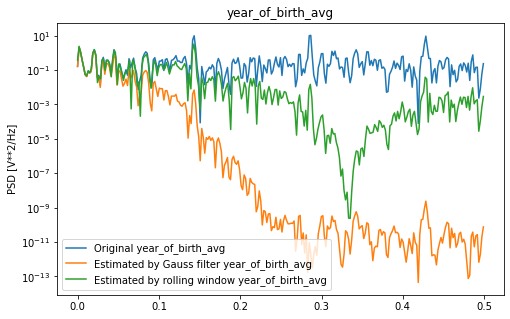

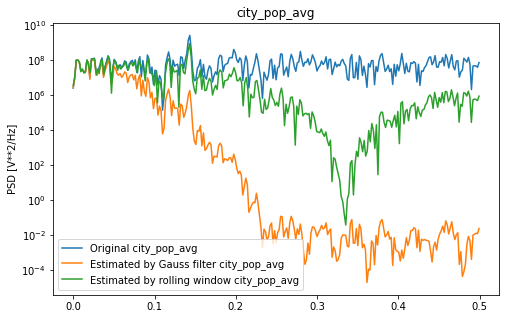

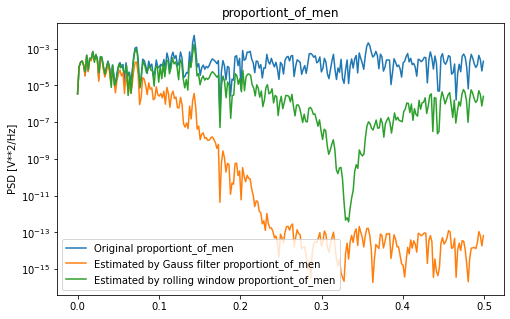

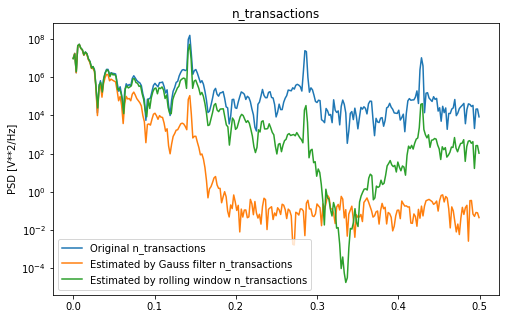

In [55]:
import warnings
warnings.filterwarnings("ignore")

for i, col in enumerate(cols_daily[1:]):
    plt.figure(figsize=(8, 5))
    f, Pxx_den = signal.welch(df_daily[col], fs=1.0, nperseg=1024, noverlap = 0)
    f_gauss, Pxx_den_gauss = signal.welch(df_daily_gauss[col], fs=1.0, nperseg=1024, noverlap = 0)
    f_rolling, Pxx_den_rolling = signal.welch(df_daily_rolling[col].dropna(), fs=1.0, nperseg=1024, noverlap = 0)
    
    plt.semilogy(f, Pxx_den, label = 'Original '+col)
    plt.semilogy(f_gauss, Pxx_den_gauss, label = 'Estimated by Gauss filter '+col)
    plt.semilogy(f_rolling, Pxx_den_rolling, label = 'Estimated by rolling window '+col)
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend()
    plt.title(col)
    plt.show()

# Step 6: Auto-regression model. 
Built auto-regression model filtered and non-filtered data. To analyze residual error and to define appropriate order of model.

In [62]:
df_daily.set_index('day', inplace = True)

In [61]:
df_daily.head(3)

amt_total  year_of_birth_avg   city_pop_avg  proportiont_of_men  \
day                                                                           
2019-01-01  156487.09        1972.878625   83988.032726            0.442419   
2019-01-02   70723.58        1972.221825   82597.916816            0.436494   
2019-01-03   86516.49        1972.491909  102757.193366            0.468447   

            n_transactions  
day                         
2019-01-01            2414  
2019-01-02            1118  
2019-01-03            1236

In [74]:
data_for_regression = df_daily[['amt_total', 'n_transactions']]\
                    .rename(columns={'amt_total': 'amt_total_original', 'n_transactions': 'n_transactions_original'})
data_for_regression['amt_total_gauss'] = df_daily_gauss.set_index('day')['amt_total']
data_for_regression['n_transactions_gauss'] = df_daily_gauss.set_index('day')['n_transactions']
data_for_regression['amt_total_rolling'] = df_daily_rolling.set_index('day')['amt_total']
data_for_regression['n_transactions_rolling'] = df_daily_rolling.set_index('day')['n_transactions']

data_for_regression.dropna(inplace=True)
data_for_regression.head()

amt_total_original  n_transactions_original  amt_total_gauss  \
day                                                                        
2019-01-07           178233.18                     2425    124130.860071   
2019-01-08           168061.93                     2314    124699.759486   
2019-01-09            88906.06                     1158    124563.654931   
2019-01-10            87716.01                     1249    124541.391753   
2019-01-11           108301.60                     1439    125233.186444   

            n_transactions_gauss  amt_total_rolling  n_transactions_rolling  
day                                                                          
2019-01-07                  1733      101319.355556             1428.777778  
2019-01-08                  1728      117082.584444             1654.888889  
2019-01-09                  1716      137711.730000             1949.222222  
2019-01-10                  1706      147650.890000             2058.666667  
2019-01-11                  1707      140221.832222             1931.777778

<Figure size 1080x216 with 0 Axes>

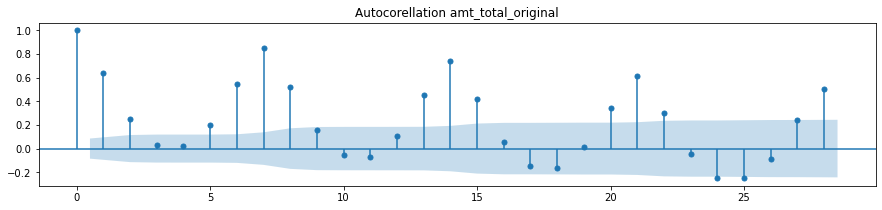

<Figure size 1080x216 with 0 Axes>

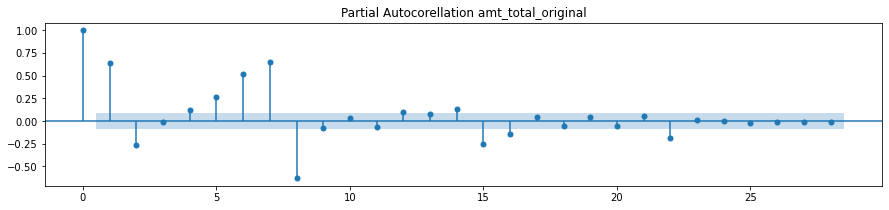

<Figure size 1080x216 with 0 Axes>

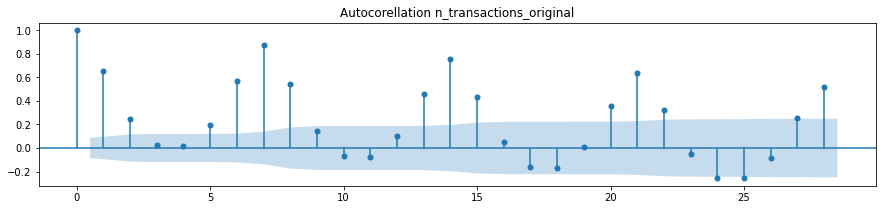

<Figure size 1080x216 with 0 Axes>

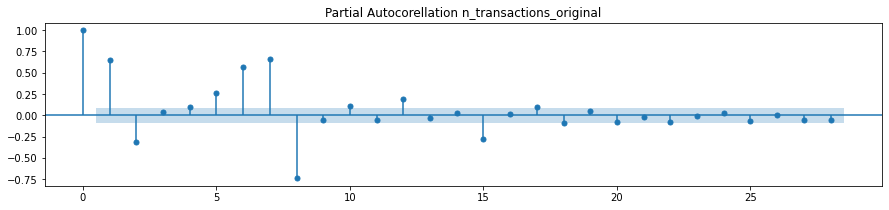

<Figure size 1080x216 with 0 Axes>

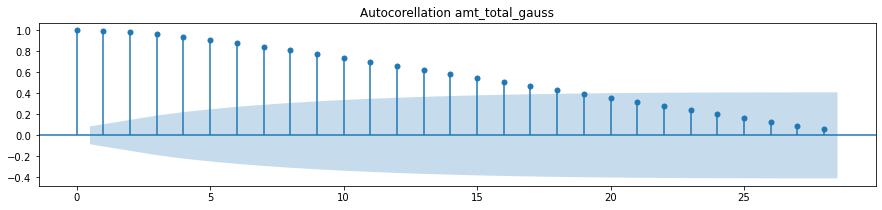

<Figure size 1080x216 with 0 Axes>

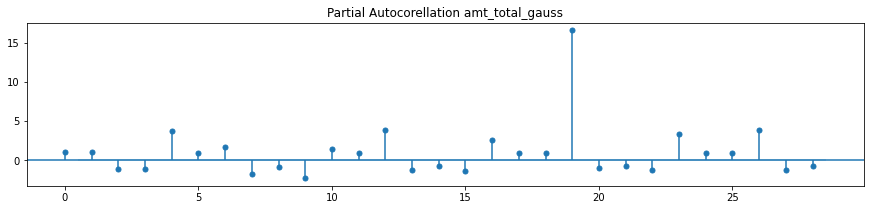

<Figure size 1080x216 with 0 Axes>

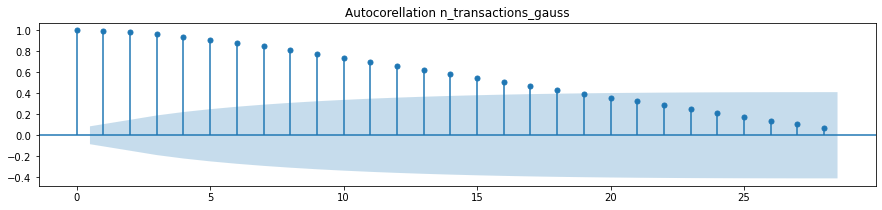

<Figure size 1080x216 with 0 Axes>

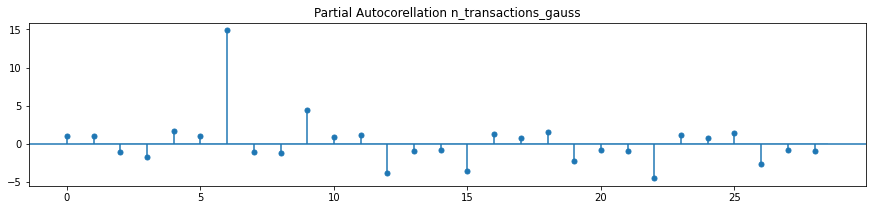

<Figure size 1080x216 with 0 Axes>

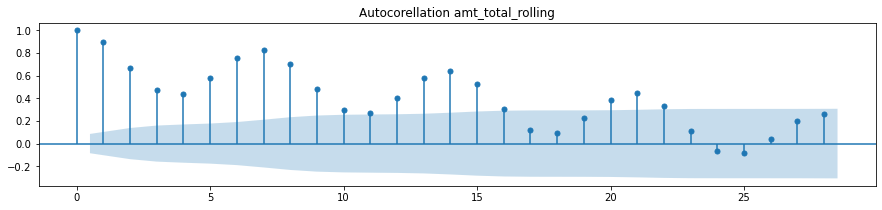

<Figure size 1080x216 with 0 Axes>

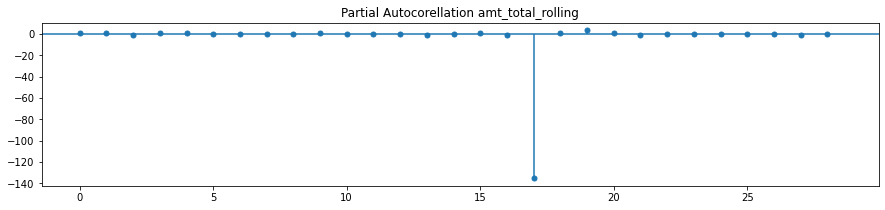

<Figure size 1080x216 with 0 Axes>

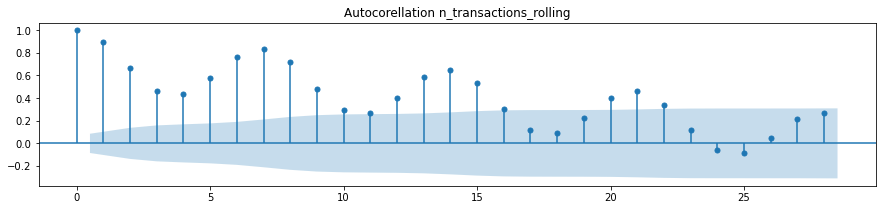

<Figure size 1080x216 with 0 Axes>

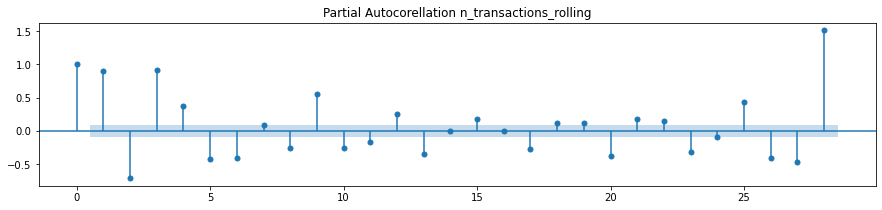

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in data_for_regression.columns:
    plt.figure(figsize(15, 3))
    plot_acf(data_for_regression[col].values.squeeze())
    plt.title('Autocorellation '+col)
    pylab.show()
    plt.figure(figsize(15, 3))
    plot_pacf(data_for_regression[col].values.squeeze())
    plt.title('Partial Autocorellation '+col)
    pylab.show()

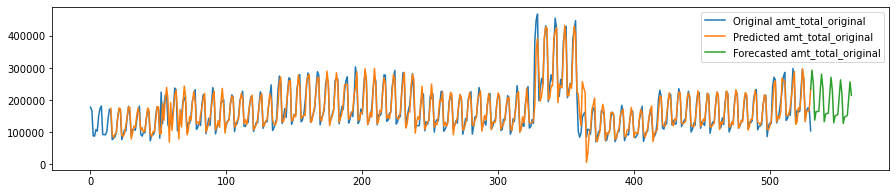

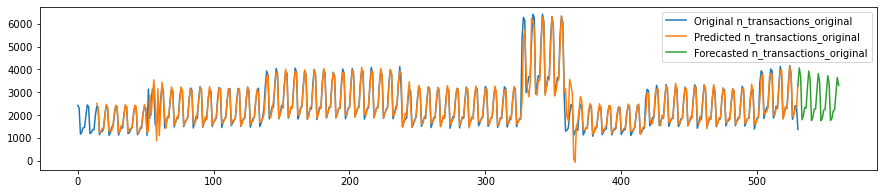

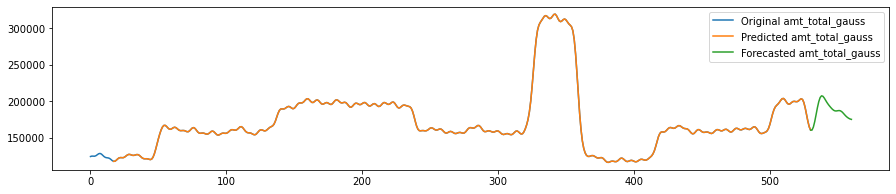

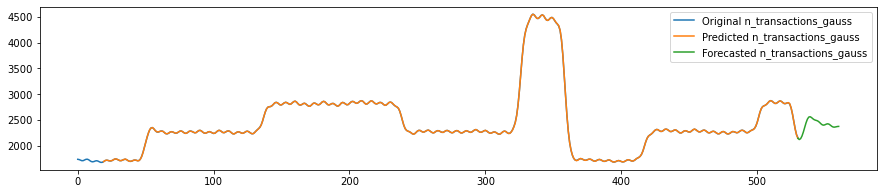

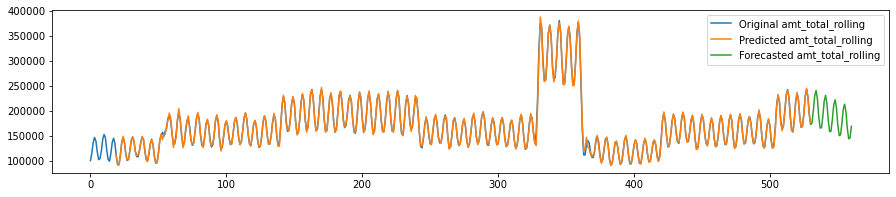

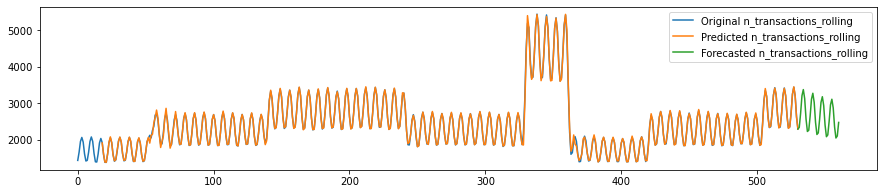

In [141]:
from statsmodels.tsa.ar_model import AutoReg
models = dict()
pred = dict()
fcst = dict()
n_lags = dict()
for col in data_for_regression.columns:
    buf = smt.stattools.adfuller(data_for_regression[col], autolag = 'AIC')
    n_lags[col] = buf[2]
    data = data_for_regression.reset_index()[col]
    models[col] = AutoReg(data, lags=n_lags[col]).fit()
    pred[col] = dict()
    start = 0
    end = data.shape[0]-1
    forecasting_limit = end+30 # prediction for a next month
    pred[col] = models[col].predict(start=start, end=end, dynamic=False)
    fcst[col]=models[col].predict(start=end, end=forecasting_limit, dynamic=True)
    
    plt.figure(figsize(15, 3))
    data.plot(label = 'Original '+col)
    pred[col].plot(label='Predicted '+col)
    fcst[col].plot(label='Forecasted '+col)
    plt.legend()
    plt.show()

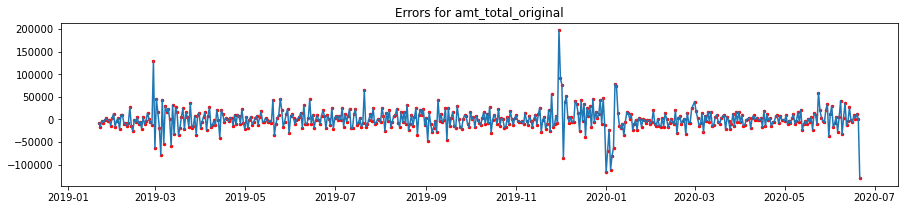

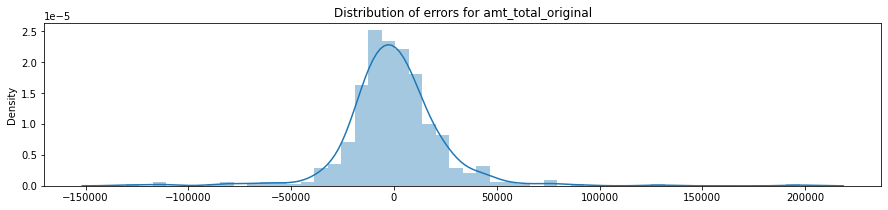

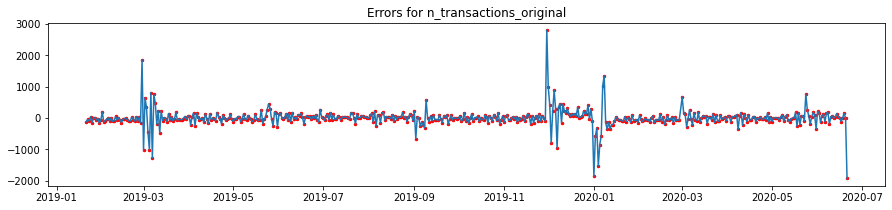

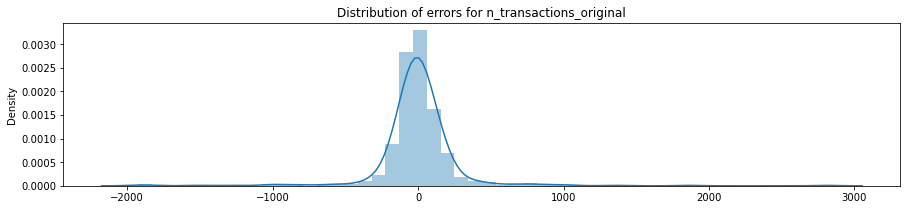

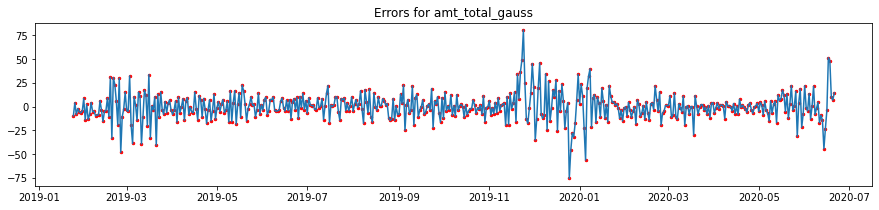

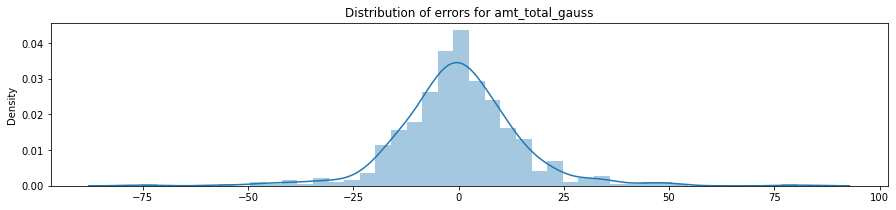

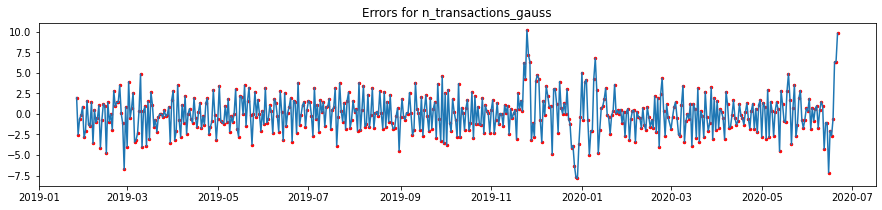

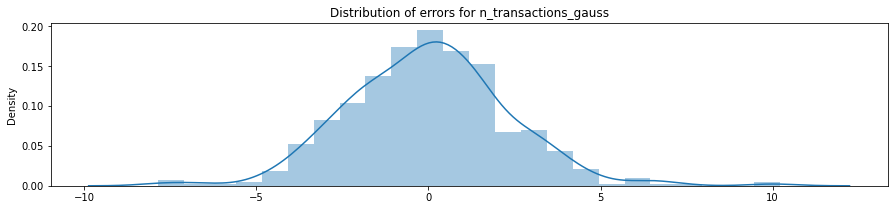

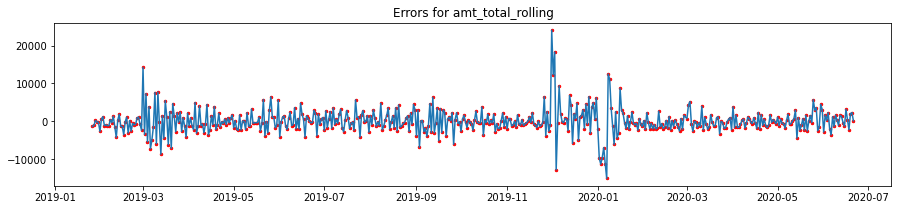

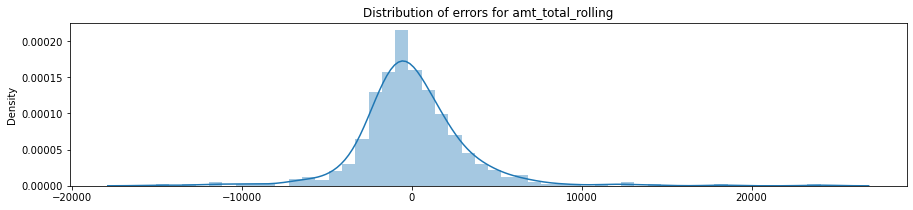

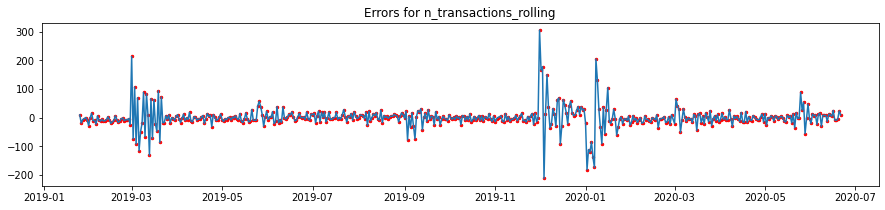

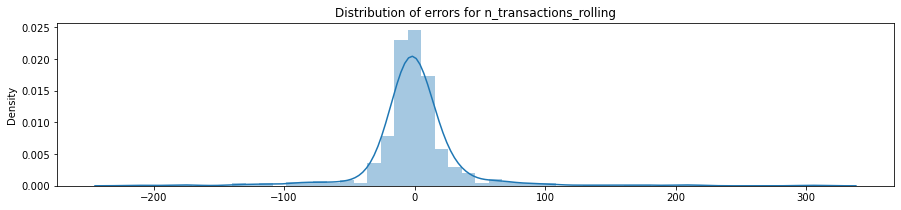

In [150]:
# data_for_regression[col]
errors = dict()
for col in data_for_regression.columns:
    errors[col] = data_for_regression[col][n_lags[col]:].values-pred[col][n_lags[col]:].values
    plt.figure(figsize(15, 3))
    plt.plot(data_for_regression.index[n_lags[col]:], errors[col]) # our mistakes
    plt.scatter(data_for_regression.index[n_lags[col]:], errors[col], s=6, c='red')
    plt.title('Errors for '+col)
    plt.show()
    
    plt.figure(figsize(15, 3))
    sns.distplot(errors[col])
    plt.title('Distribution of errors for '+col)
    plt.show()

In [158]:
r2 = []
mae = []
mse = []
for col in data_for_regression.columns:
    r2.append(r2_score(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
    mae.append(mean_absolute_error(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
    mse.append(mean_squared_error(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
metrics_table=pd.DataFrame({'Model': data_for_regression.columns, 'R2 score': r2, 'MAE': mae, 'MSE': mse})

In [159]:
metrics_table

Model  R2 score           MAE           MSE
0       amt_total_original  0.874634  15756.899589  6.012435e+08
1  n_transactions_original  0.913733    142.393170  8.459271e+04
2          amt_total_gauss  1.000000     10.198209  2.101187e+02
3     n_transactions_gauss  0.999985      1.798402  5.490299e+00
4        amt_total_rolling  0.995922   2154.637283  1.077142e+07
5   n_transactions_rolling  0.997315     20.125942  1.459202e+03

# Step 7: Model in a form of linear dynamical system. 
Build model in a form of linear dynamical system, using chosen predictors. To analyze residual error and to define appropriate order of model.

#### We will use Vector Autoregressions from `statsmodels.tsa.api`

In [257]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str


In [258]:
df_daily.corr()

amt_total  year_of_birth_avg  city_pop_avg  \
amt_total            1.000000           0.130884      0.251921   
year_of_birth_avg    0.130884           1.000000      0.170466   
city_pop_avg         0.251921           0.170466      1.000000   
proportiont_of_men  -0.233887          -0.085160     -0.164819   
n_transactions       0.990943           0.141406      0.249024   

                    proportiont_of_men  n_transactions  
amt_total                    -0.233887        0.990943  
year_of_birth_avg            -0.085160        0.141406  
city_pop_avg                 -0.164819        0.249024  
proportiont_of_men            1.000000       -0.233609  
n_transactions               -0.233609        1.000000

In [259]:
# df_daily
data_to_predict=df_daily
model = VAR(data_to_predict)

In [260]:
forecast_days = 30
results = model.fit(forecast_days)
results.summary() # Report needs only summary of target variables

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Nov, 2021
Time:                     02:36:57
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    44.0798
Nobs:                     507.000    HQIC:                   40.2523
Log likelihood:          -12420.0    FPE:                2.81390e+16
AIC:                      37.7829    Det(Omega_mle):     7.64222e+15
--------------------------------------------------------------------
Results for equation amt_total
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                    6078149.437605  23772302.568156            0.256           0.798
L1.amt_total                   0.009826         0.130426            0.075           0.940
L1.year_of_birth_avg

In [261]:
max_lags = max(n_lags.values())
model.select_order(max_lags)
results = model.fit(maxlags=max_lags, ic='aic')

In [262]:
lag_order = results.k_ar
results.forecast(data_to_predict.values[-lag_order:], 5) # Predictions for next 5 days as an example

array([[1.56019799e+05, 1.97376075e+03, 1.02220635e+05, 4.44645514e-01,
        2.49776353e+03],
       [1.81790714e+05, 1.97346425e+03, 9.18017323e+04, 4.54929690e-01,
        2.55357349e+03],
       [6.02369338e+04, 1.97282714e+03, 8.96401409e+04, 4.52913526e-01,
        8.01169416e+02],
       [6.07308708e+04, 1.97267069e+03, 7.81261588e+04, 4.56984071e-01,
        8.76866978e+02],
       [1.04394492e+05, 1.97400692e+03, 8.89493089e+04, 4.49568569e-01,
        1.50901981e+03]])

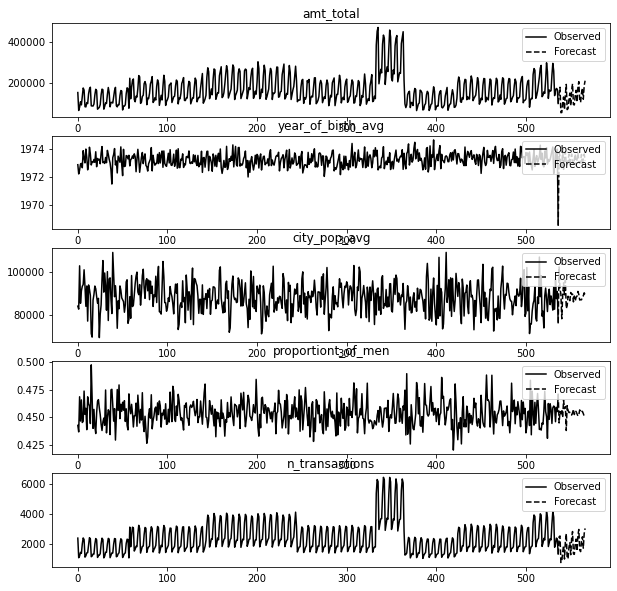

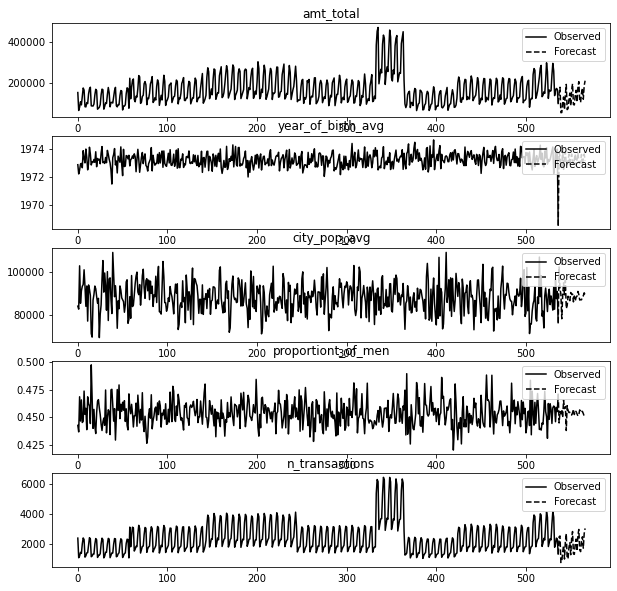

In [263]:
results.plot_forecast(forecast_days, plot_stderr=False) # I don't know why it plots twice. Must be a bug in statmodels

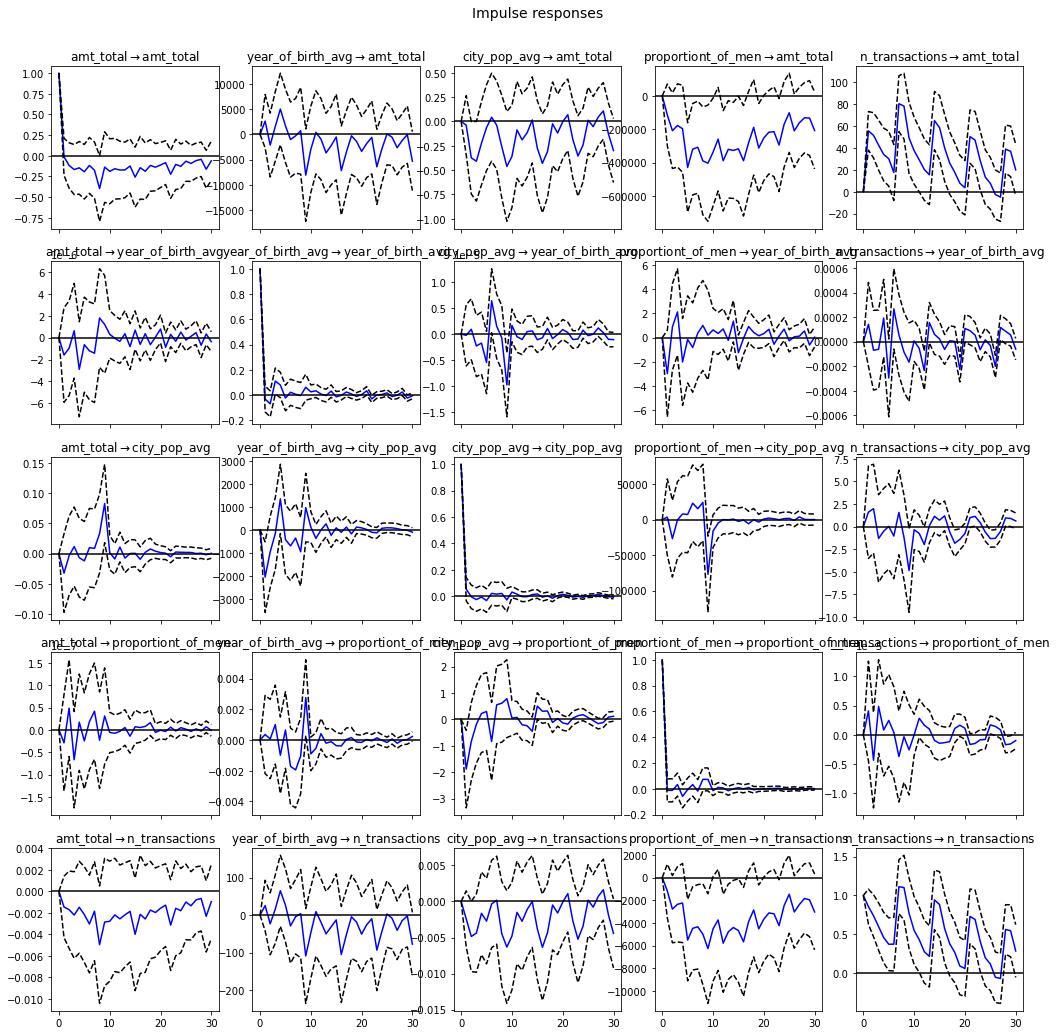

In [371]:
irf = results.irf(forecast_days) #Impulse Response Analysis
# plt.figure(figsize(20, 20))
irf.plot(orth=False, figsize=(15, 15)) # It reflects how one variable affects others. Closer it to 0 - less dependency
plt.savefig('irf.png')

In [265]:
fevd = results.fevd(forecast_days) # Forecast Error Variance Decomposition
fevd.summary()

FEVD for amt_total
      amt_total  year_of_birth_avg  city_pop_avg  proportiont_of_men  n_transactions
0      1.000000           0.000000      0.000000            0.000000        0.000000
1      0.941210           0.003594      0.000254            0.002472        0.052469
2      0.901321           0.003401      0.007070            0.008102        0.080106
3      0.875384           0.003773      0.013712            0.011337        0.095794
4      0.857337           0.008714      0.014893            0.015137        0.103920
5      0.833255           0.009275      0.014262            0.033692        0.109516
6      0.822356           0.009133      0.014151            0.043461        0.110898
7      0.806805           0.007047      0.010593            0.040072        0.135484
8      0.776832           0.006573      0.010871            0.045197        0.160526
9      0.759817           0.011407      0.014343            0.051501        0.162933
10     0.749433           0.011608      0.0163

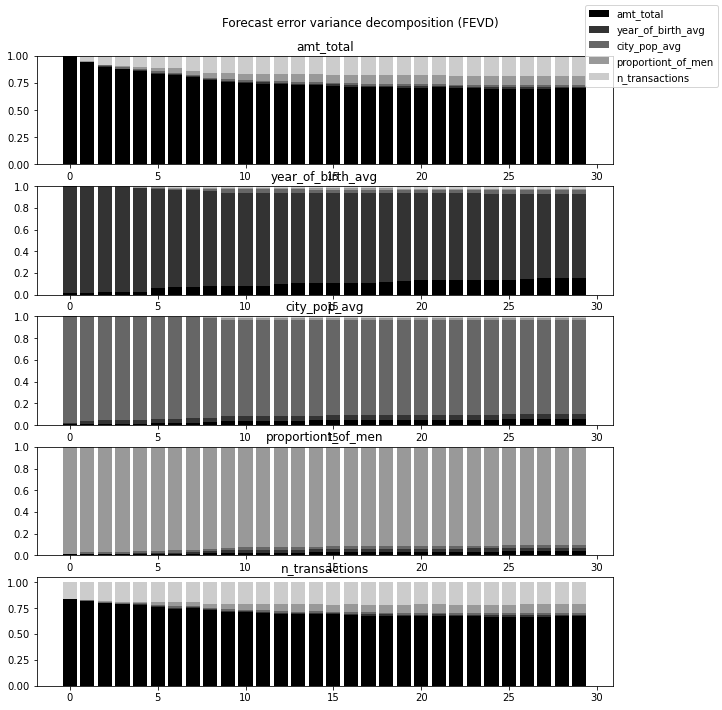

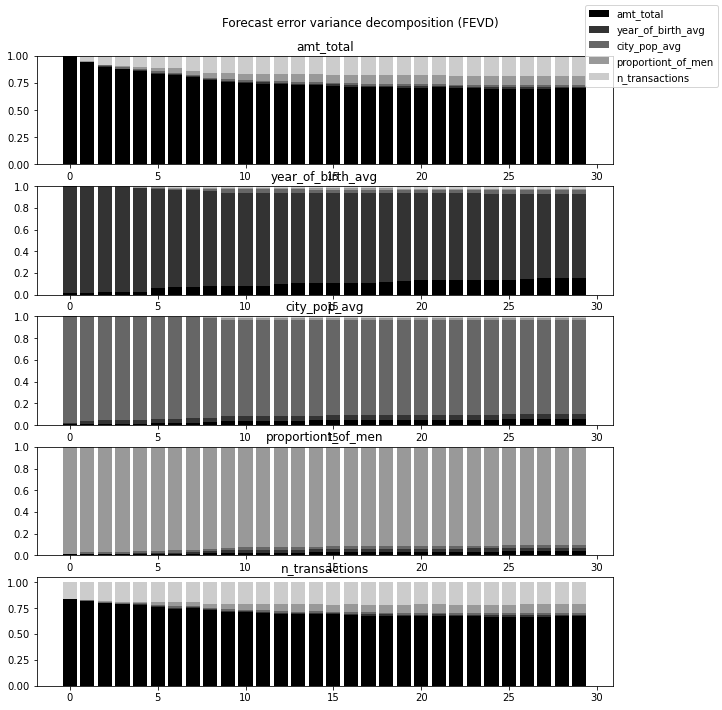

In [266]:
fevd.plot(forecast_days)

#### To calculate the quality of our model we will fit it with data without the last month we have, predict it and then compare predictions and real outcomes

In [363]:
forecast_days = 30
df_ = df_daily.drop(df_daily.tail(1).index)
# test_data.drop(test_data.tail(1).index)
train_data = df_[:-forecast_days]
test_data = df_[-forecast_days:]

In [364]:
model = VAR(data_to_predict)
# results = model.fit(forecast_days)
max_lags = max(n_lags.values())
# model.select_order(max_lags)
results = model.fit(maxlags=max_lags, ic='aic')
lag_order = results.k_ar
predictions = results.forecast(train_data.values[-lag_order:], forecast_days)

In [365]:
predictions = pd.DataFrame(predictions, columns=test_data.columns)

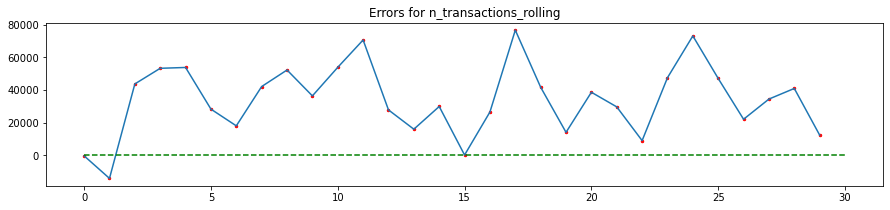

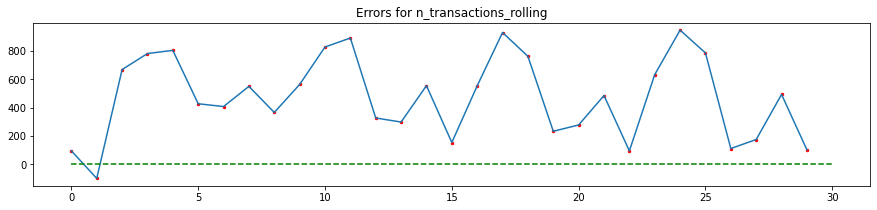

In [366]:
errors_amt = (test_data.reset_index().drop(columns=['day'])-predictions)['amt_total']
plt.figure(figsize(15, 3))
plt.plot(errors_amt) # our mistakes
plt.plot([0, 1, forecast_days], [0, 0, 0], 'g--')
plt.scatter(range(forecast_days), errors_amt, s=6, c='red')
plt.title('Errors for '+col)
plt.show()
errors_n_trans = (test_data.reset_index().drop(columns=['day'])-predictions)['n_transactions']
plt.figure(figsize(15, 3))
plt.plot(errors_n_trans) # our mistakes
plt.plot([0, 1, forecast_days], [0, 0, 0], 'g--')
plt.scatter(range(forecast_days), errors_n_trans, s=6, c='red')
plt.title('Errors for '+col)
plt.show()

In [367]:
MAE = (test_data.reset_index().drop(columns=['day'])-predictions).apply(abs)[['amt_total', 'n_transactions']]
MAE.rename(columns={'amt_total': 'amt_total_MAE', 'n_transactions': 'n_transactions_MAE'}, inplace=True)
MAE['amt_total_real'] = test_data.reset_index()['amt_total']
MAE['n_transactions_real'] = test_data.reset_index()['n_transactions']
MAE['amt_total_percent'] = MAE['amt_total_MAE']/MAE['amt_total_real']*100
MAE['n_transactions_percent'] = MAE['n_transactions_MAE']/MAE['n_transactions_real']*100
MAE['amt_total_cumsum'] = MAE['amt_total_MAE'].cumsum()
MAE['n_transactions_cumsum'] = MAE['n_transactions_MAE'].cumsum()

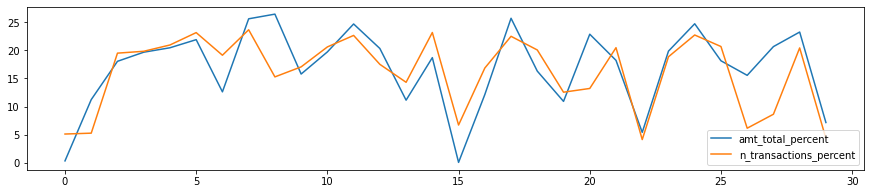

In [368]:
plt.plot(MAE['amt_total_percent'], label='amt_total_percent')
plt.plot(MAE['n_transactions_percent'], label='n_transactions_percent')
plt.legend()
plt.show()

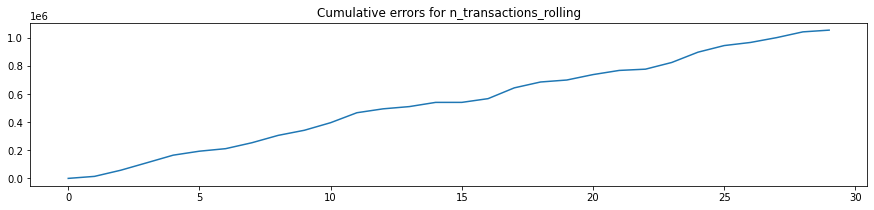

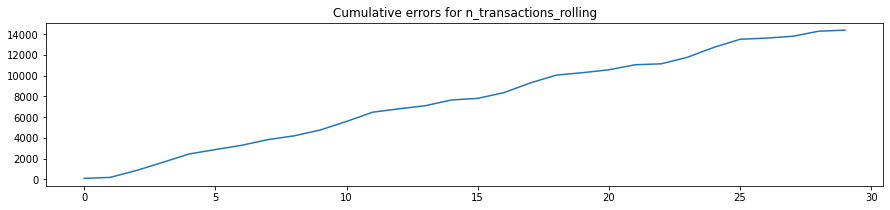

In [370]:
plt.figure(figsize(15, 3))
plt.plot(MAE['amt_total_cumsum']) # our mistakes
plt.title('Cumulative errors for '+col)
plt.show()
errors_n_trans = (test_data.reset_index().drop(columns=['day'])-predictions)['n_transactions']
plt.figure(figsize(15, 3))
plt.plot(MAE['n_transactions_cumsum']) # our mistakes
plt.title('Cumulative errors for '+col)
plt.show()

Error is growing linearly

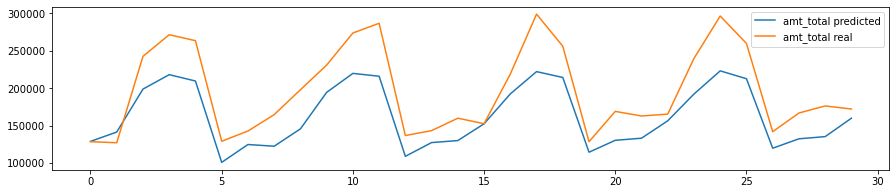

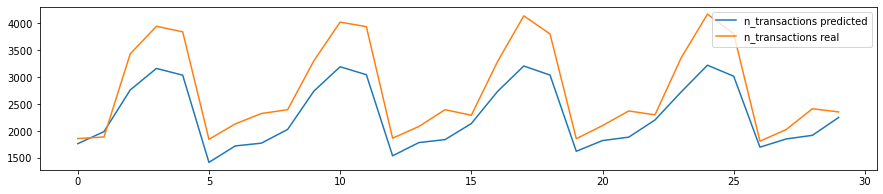

In [378]:
plt.figure(figsize(15, 3))
plt.plot(predictions['amt_total'], label='amt_total predicted')
plt.plot(test_data.reset_index()['amt_total'], label='amt_total real')
plt.legend()
plt.figure(figsize(15, 3))
plt.plot(predictions['n_transactions'], label='n_transactions predicted')
plt.plot(test_data.reset_index()['n_transactions'], label='n_transactions real')
plt.legend()
plt.show()

In [374]:
test_data

amt_total  year_of_birth_avg   city_pop_avg  proportiont_of_men  \
day                                                                           
2020-05-22  128437.60        1972.838172   75649.226344            0.433871   
2020-05-23  127044.69        1972.506878   81693.044444            0.473545   
2020-05-24  242348.25        1973.321866   85099.415743            0.453644   
2020-05-25  271227.48        1973.935566   86654.392948            0.442669   
2020-05-26  263256.79        1972.756187   93178.583485            0.463402   
2020-05-27  129065.34        1973.299567   78315.268689            0.444204   
2020-05-28  142647.61        1973.526513   77051.284374            0.459878   
2020-05-29  164521.93        1973.061505   88250.619355            0.471398   
2020-05-30  197791.64        1973.241653   85209.126461            0.456594   
2020-05-31  230654.81        1973.468362  106823.872237            0.438692   
2020-06-01  273514.23        1974.258273   88390.233640            0.439662   
2020-06-02  286499.19        1973.242694   98164.939517            0.438119   
2020-06-03  136664.92        1973.696840   79328.788431            0.444563   
2020-06-04  143195.89        1972.845969   81662.550864            0.443378   
2020-06-05  159802.48        1972.721619   73843.752087            0.455342   
2020-06-06  152440.11        1973.840750   88733.560646            0.473386   
2020-06-07  218711.45        1973.354319   92401.618309            0.454988   
2020-06-08  298702.91        1974.083192   87282.253204            0.450302   
2020-06-09  255865.74        1972.915241   81485.280337            0.430640   
2020-06-10  128413.47        1973.253498   89373.714209            0.462325   
2020-06-11  168896.63        1973.117563   91874.846740            0.447882   
2020-06-12  162727.24        1973.242833   84695.220489            0.462057   
2020-06-13  165243.19        1973.528696   88745.881739            0.456957   
2020-06-14  239596.41        1973.846383   86181.564454            0.444180   
2020-06-15  296172.66        1974.132949   82152.644348            0.458363   
2020-06-16  259567.11        1972.250132   92856.233298            0.460021   
2020-06-17  141792.48        1972.752759   82550.405077            0.459161   
2020-06-18  166713.71        1973.782544   96360.176036            0.445759   
2020-06-19  176152.74        1973.198508   87483.935765            0.458765   
2020-06-20  172070.93        1973.982158   90798.680969            0.454970   

            n_transactions  
day                         
2020-05-22            1860  
2020-05-23            1890  
2020-05-24            3430  
2020-05-25            3942  
2020-05-26            3839  
2020-05-27            1846  
2020-05-28            2131  
2020-05-29            2325  
2020-05-30            2396  
2020-05-31            3303  
2020-06-01            4019  
2020-06-02            3935  
2020-06-03            1867  
2020-06-04            2084  
2020-06-05            2396  
2020-06-06            2292  
2020-06-07            3288  
2020-06-08            4135  
2020-06-09            3799  
2020-06-10            1858  
2020-06-11            2101  
2020-06-12            2372  
2020-06-13            2300  
2020-06-14            3359  
2020-06-15            4167  
2020-06-16            3802  
2020-06-17            1812  
2020-06-18            2028  
2020-06-19            2413  
2020-06-20            2354

# The end of the report